# Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mounting Google Drive to access the dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset from a CSV file
dataset = pd.read_csv('/content/drive/My Drive/KaggleDatasets/Fish.csv')

# Extracting features and target variable from the dataset
X = dataset.iloc[:, [0, 2, 3, 5, 6]].values
y = dataset.iloc[:, 1].values

# Encoding categorical data

In [4]:
# Encoding categorical data - transforming species names into numerical values
from sklearn.preprocessing import LabelEncoder

labelEncoder_X = LabelEncoder()
X[:, 0] = labelEncoder_X.fit_transform(X[:, 0])
X

array([[0, 23.2, 25.4, 11.52, 4.02],
       [0, 24.0, 26.3, 12.48, 4.3056],
       [0, 23.9, 26.5, 12.3778, 4.6961],
       [0, 26.3, 29.0, 12.73, 4.4555],
       [0, 26.5, 29.0, 12.444, 5.134],
       [0, 26.8, 29.7, 13.6024, 4.9274],
       [0, 26.8, 29.7, 14.1795, 5.2785],
       [0, 27.6, 30.0, 12.67, 4.69],
       [0, 27.6, 30.0, 14.0049, 4.8438],
       [0, 28.5, 30.7, 14.2266, 4.9594],
       [0, 28.4, 31.0, 14.2628, 5.1042],
       [0, 28.7, 31.0, 14.3714, 4.8146],
       [0, 29.1, 31.5, 13.7592, 4.368],
       [0, 29.5, 32.0, 13.9129, 5.0728],
       [0, 29.4, 32.0, 14.9544, 5.1708],
       [0, 29.4, 32.0, 15.438, 5.58],
       [0, 30.4, 33.0, 14.8604, 5.2854],
       [0, 30.4, 33.0, 14.938, 5.1975],
       [0, 30.9, 33.5, 15.633, 5.1338],
       [0, 31.0, 33.5, 14.4738, 5.7276],
       [0, 31.3, 34.0, 15.1285, 5.5695],
       [0, 31.4, 34.0, 15.9936, 5.3704],
       [0, 31.5, 34.5, 15.5227, 5.2801],
       [0, 31.8, 35.0, 15.4686, 6.1306],
       [0, 31.9, 35.0, 16.2405, 5.58

## Applying OneHotEncoder

In [5]:
# Applying OneHotEncoder to the species column to handle categorical nature
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Species", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 25.4, 11.52, 4.02],
       [1.0, 0.0, 0.0, ..., 26.3, 12.48, 4.3056],
       [1.0, 0.0, 0.0, ..., 26.5, 12.3778, 4.6961],
       ...,
       [0.0, 0.0, 0.0, ..., 13.0, 2.277, 1.2558],
       [0.0, 0.0, 0.0, ..., 14.3, 2.8728, 2.0672],
       [0.0, 0.0, 0.0, ..., 15.0, 2.9322, 1.8792]], dtype=object)

# Splitting the dataset into the training set and Test set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Polynomial Regression to the training data


In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2) # Creating instance of PolynomialFeatures
X_train_poly = poly_reg.fit_transform(X_train) # Transforming training data

In [8]:
from sklearn.linear_model import LinearRegression

regrosser = LinearRegression() # Creating instance of LinearRegression
regrosser.fit(X_train_poly, y_train) # Fitting the model on polynomial features

LinearRegression()

# Predicting the Test set result

In [9]:
# Transforming X_test with the same PolynomialFeatures instance
X_test_poly = poly_reg.transform(X_test)

# Predicting with the transformed X_test
y_pred = regrosser.predict(X_test_poly)

# Model testing and evaluation


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating R-squared to measure the goodness of fit
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# Calculating Mean Absolute Error to measure the average errors in predictions
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculating Mean Squared Error to measure the average of the squares of the errors
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating Root Mean Squared Error to measure the square root of the average of squared errors
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared (R²): 0.9634586053153915
Mean Absolute Error (MAE): 49.182183837890626
Mean Squared Error (MSE): 6955.67812984705
Root Mean Squared Error (RMSE): 83.40070820950532


# Visualizing the results


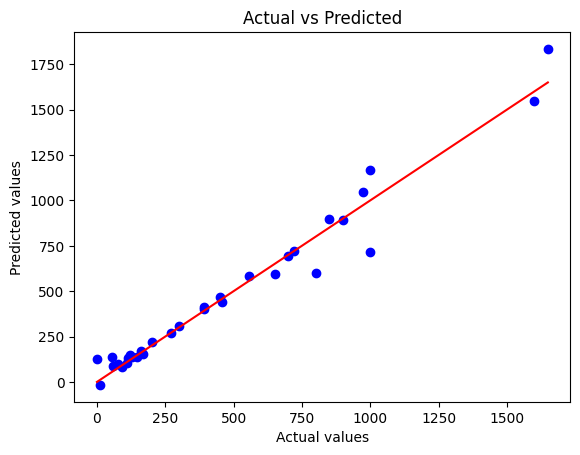

In [11]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

## Residuals
* What are Residuals?: Residuals are the differences between the actual values (observed data points) and the values predicted by the regression model. They represent the portion of the dependent variable that the model does not explain.

* Why are Residuals Important?: Analyzing the pattern of residuals helps in diagnosing the regression model and verifying the assumptions of linear regression. If the model is a good fit, the residuals should be randomly distributed around zero, indicating that the model's predictions are unbiased and the variance is constant.

* Use in Model Evaluation: Residual plots (scatter plots of predicted values against residuals) are used to detect issues like non-linearity, heteroscedasticity (non-constant variance of residuals), and outliers. Ideally, in a well-fitted model, the residuals should not have a pattern that is discernible and should be centered around zero across all levels of predicted values.



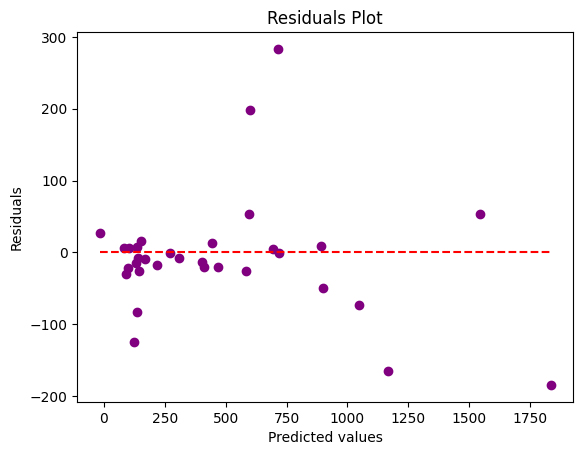

In [12]:
# Residuals plot to check the distribution of residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()